# EDA Application with a Real Data Set - Draft Version 1
## https://www.kaggle.com/c/santander-customer-satisfaction

## Data Set

- Santander Bank is asking to help identify dissatisfied customers in their relationship with hundreds of anonymized features. Please visit the website and read details about it.

- 743 columns (ID, TARGET, and features), 76020 rows: train and test data sets.

- The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

- Data file descriptions:

        train.csv - the training set including the target
        test.csv - the test set without the target
        sample_submission.csv - a sample submission file in the correct format


## Goal

- The task: 
    1. to describe the data set
        - data type for each column 
        - missingness
        - univariate summaries
        - bivariate summaries
            - associations
            - correlations
            - patterns
        - multivariate summaries
        - more
    2. to predict the probability that each customer in the test set is an unsatisfied customer.
    3. to predict if a customer is satisfied or dissatisfied with their banking experience.


## Housekeeping

Know 
- where you are working
- version check
- shorcuts: https://youtu.be/d0oBRIONOEw

What packs to use
- pandas
- ..


### Step 1: Source and load the data

In [1]:
# Import necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import boto3
client = boto3.client('s3')
train_path = 's3://classdataset/train.csv'
test_path = 's3://classdataset/test.csv'
train= pd.read_csv(train_path)
test = pd.read_csv(test_path)

### Step 2: Data Wrangling 

In [3]:
# Look the number of rows and columns
train.shape

(76020, 371)

In [4]:
# Check out the first 5 rows of the data set
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
# Check out the data types, number of entries and other details
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
# Given we couldn't see NaNs from the df.info(), let's do this another way
train.isnull().sum().nlargest()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
dtype: int64

In [7]:
# Number of columns with all zeros
np.sum(train.mean()==0)

34

In [8]:
# Columns with all zeros
zero_mean = (train.mean()==0).to_frame(name='ZeroMean')

In [9]:
zero_mean = zero_mean.loc[zero_mean.ZeroMean]

In [10]:
# We can get rid of the columns with all zeros, there is no information to gain from them
remove_features = list(zero_mean.index)

In [11]:
train = train.drop(remove_features, axis=1)
train.shape

(76020, 337)

Notice the number of columns that decreased from original 371 to 337

In [38]:
# Number of columns with all zeros
np.sum(train.mean()==0)

0

In [14]:
# Let's look at classes of the target 
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

### Step 3: Exploratory Data Analysis (EDA)

In [15]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


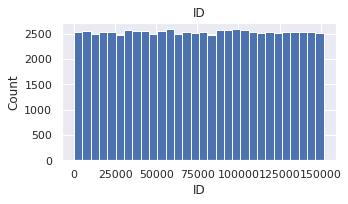

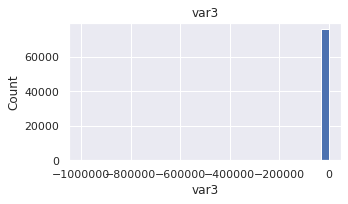

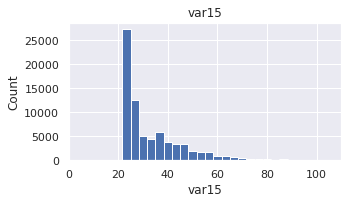

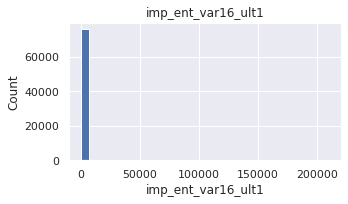

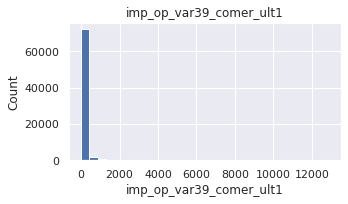

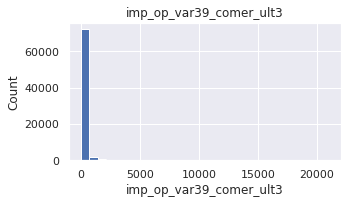

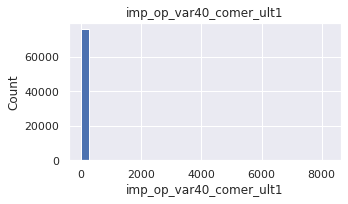

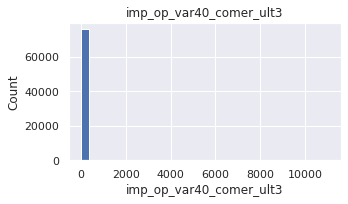

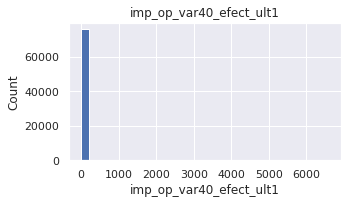

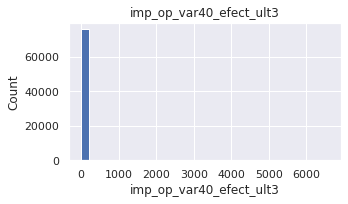

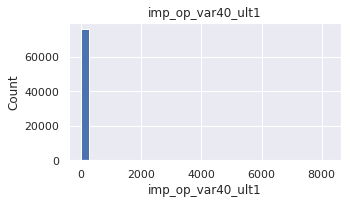

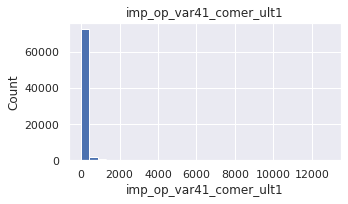

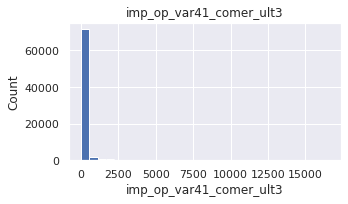

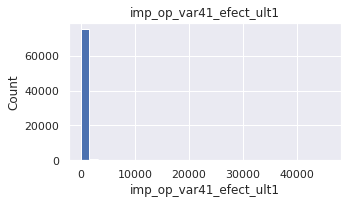

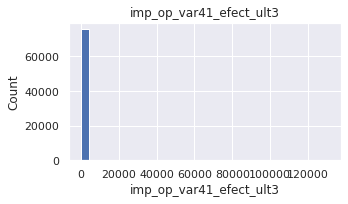

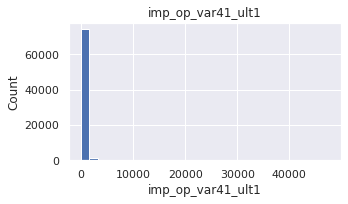

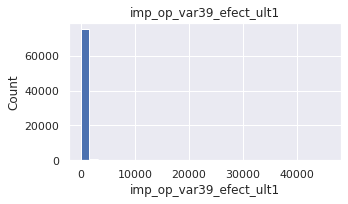

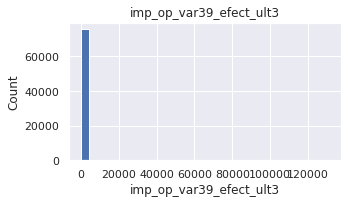

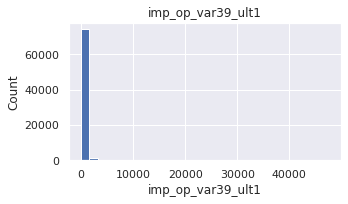

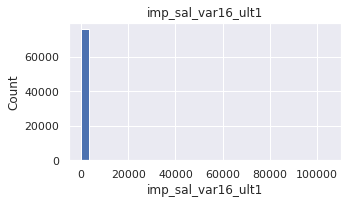

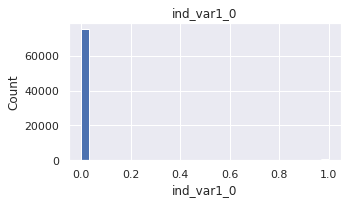

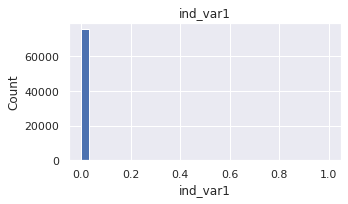

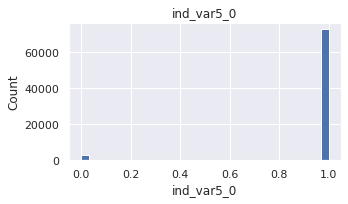

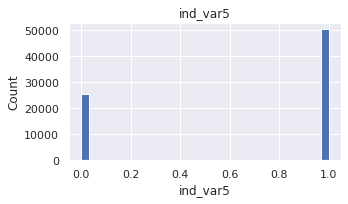

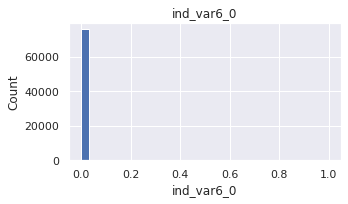

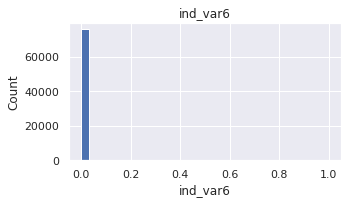

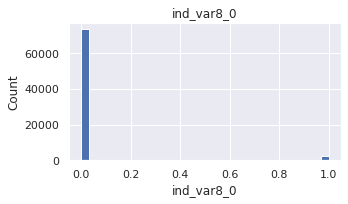

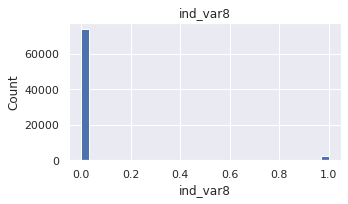

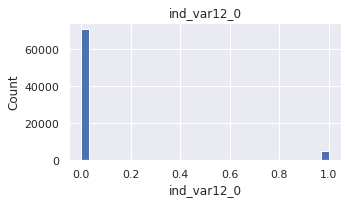

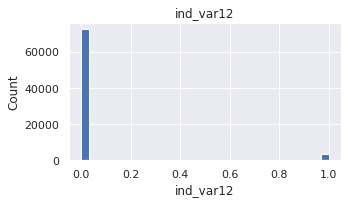

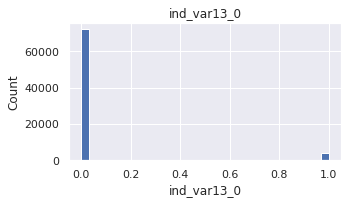

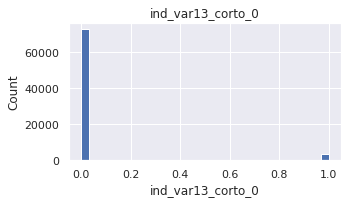

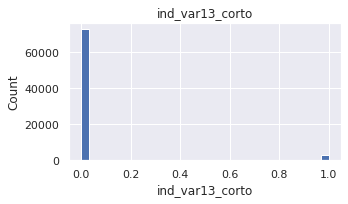

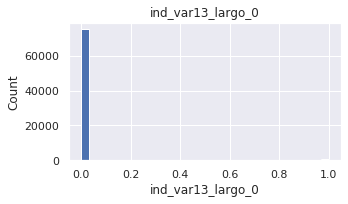

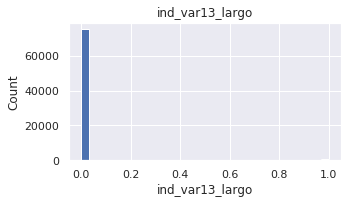

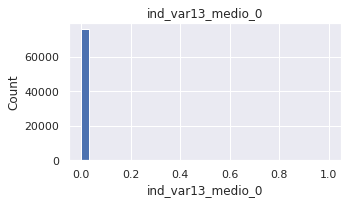

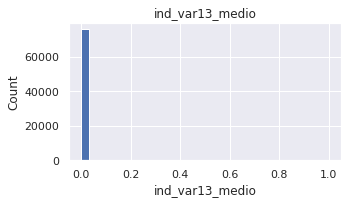

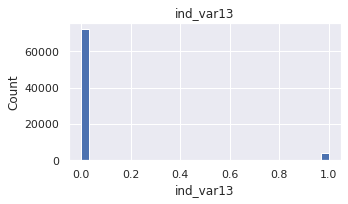

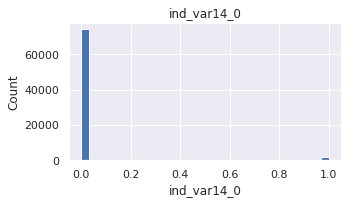

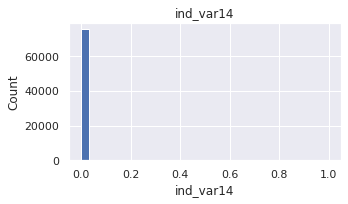

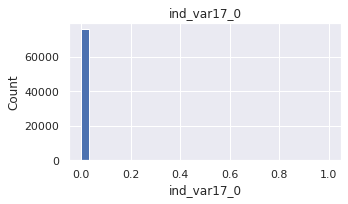

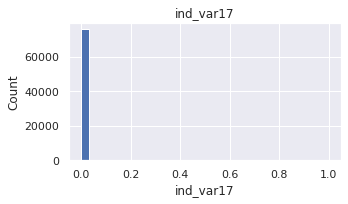

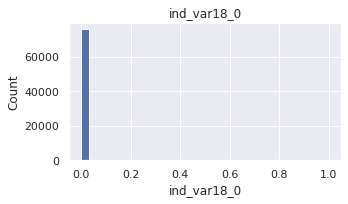

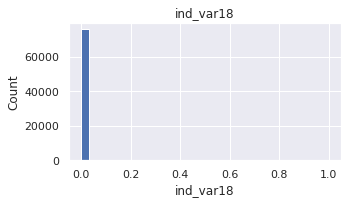

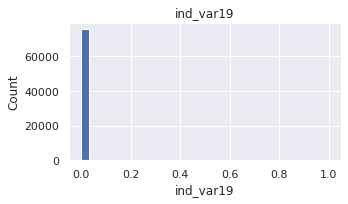

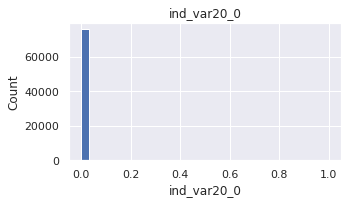

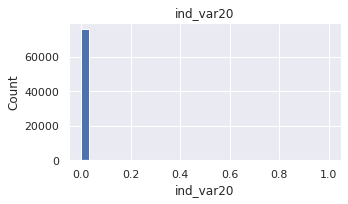

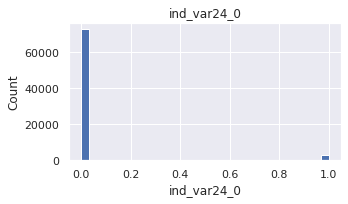

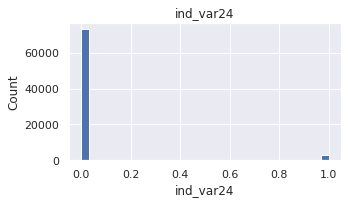

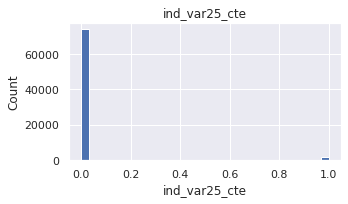

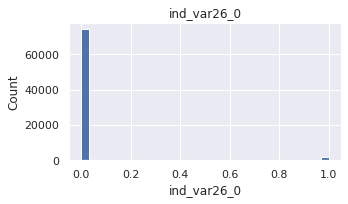

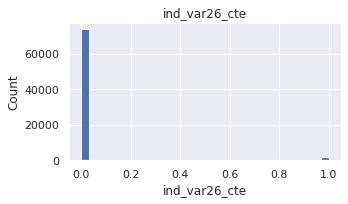

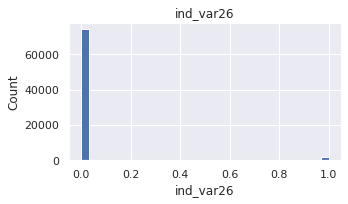

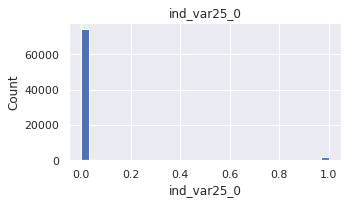

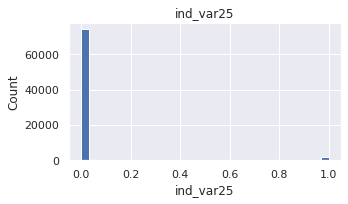

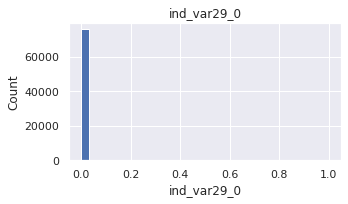

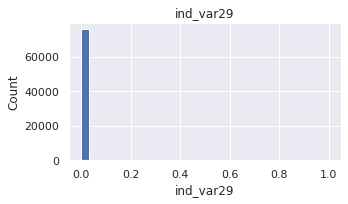

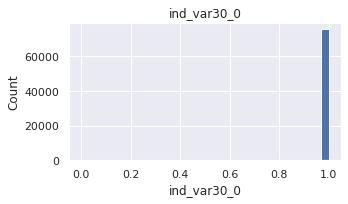

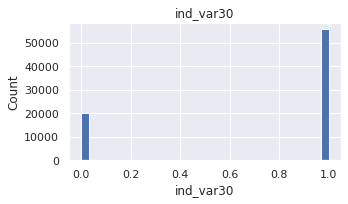

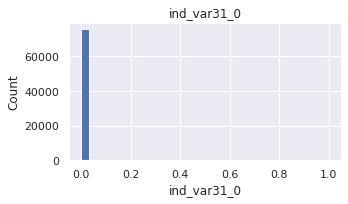

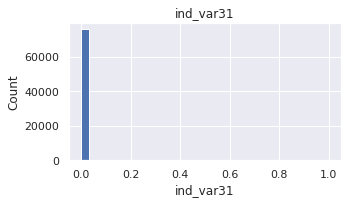

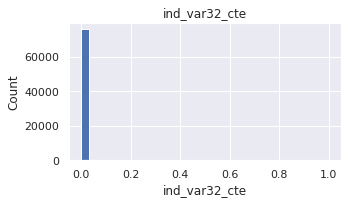

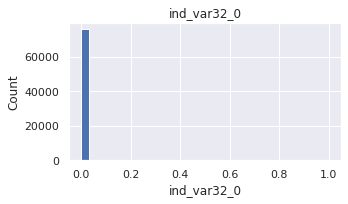

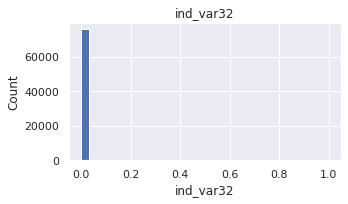

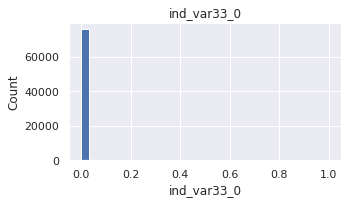

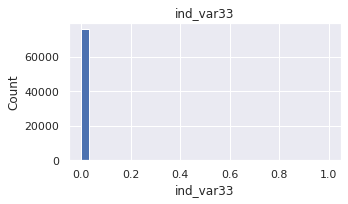

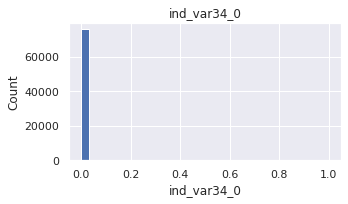

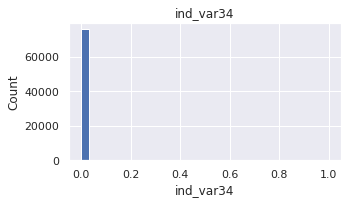

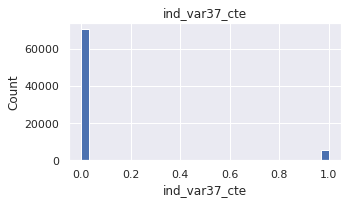

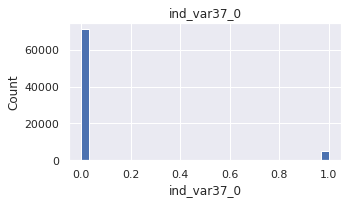

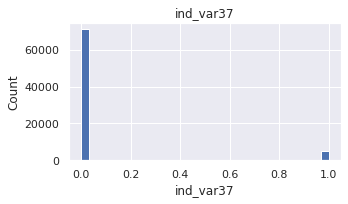

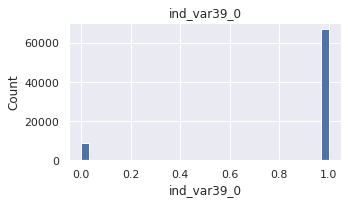

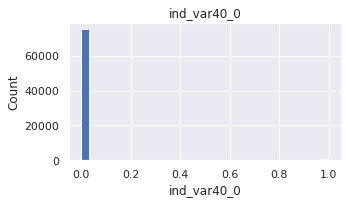

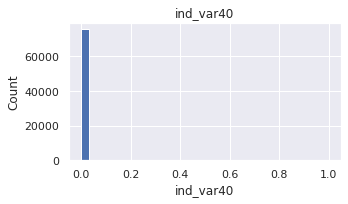

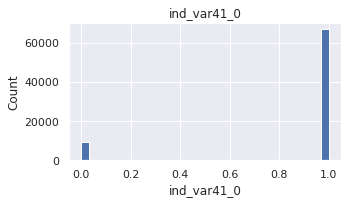

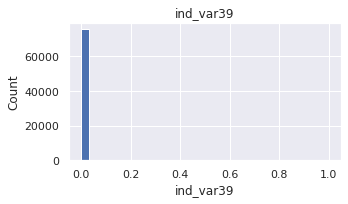

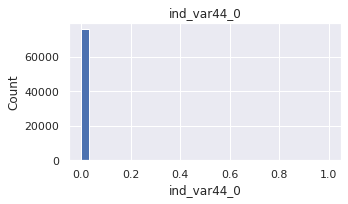

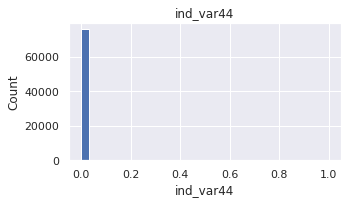

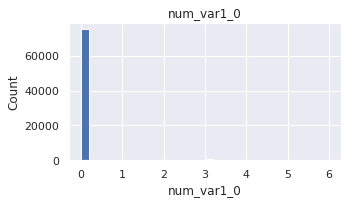

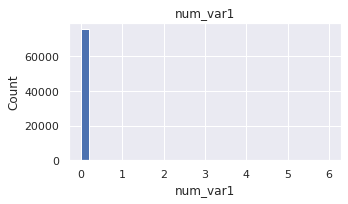

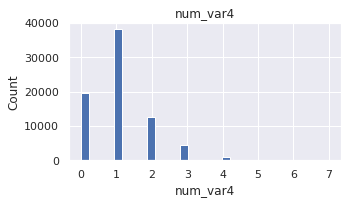

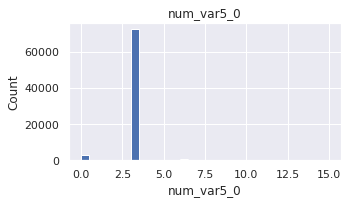

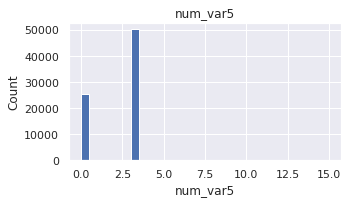

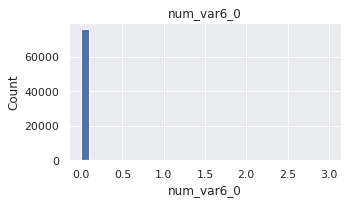

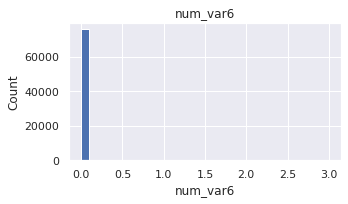

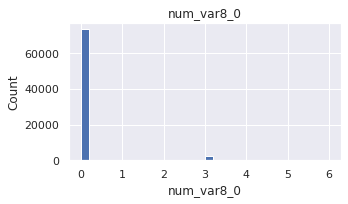

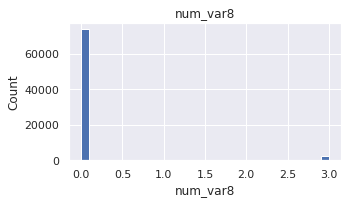

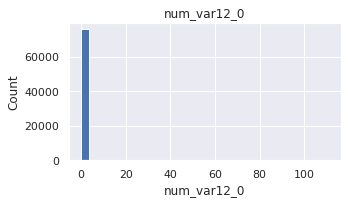

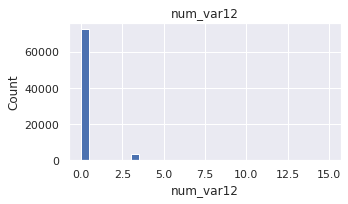

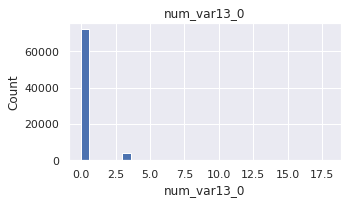

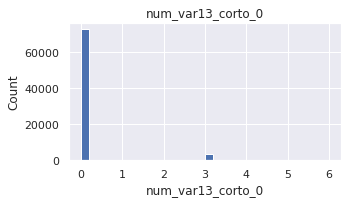

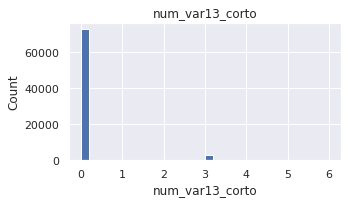

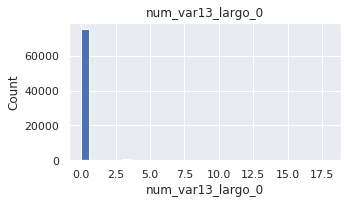

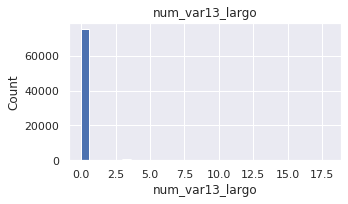

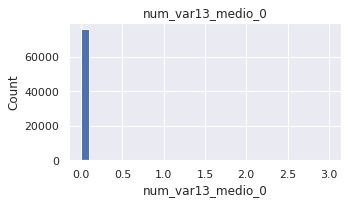

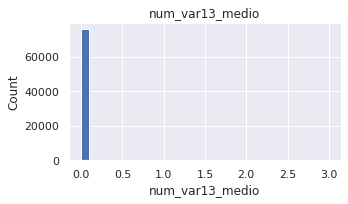

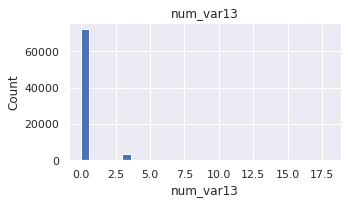

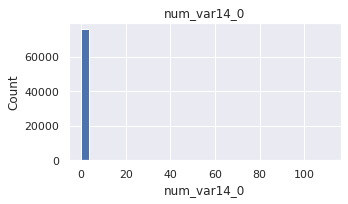

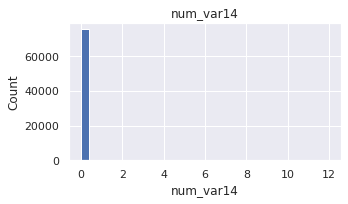

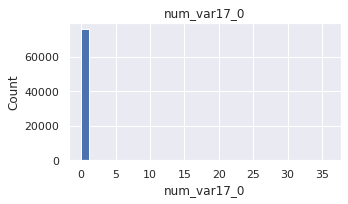

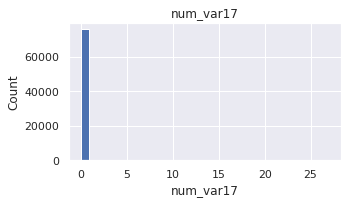

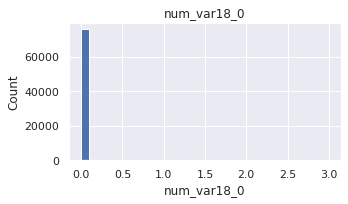

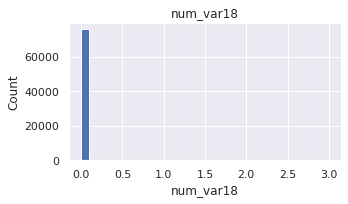

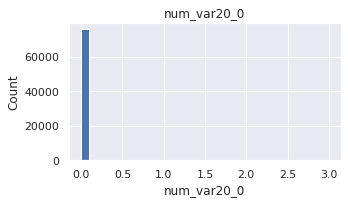

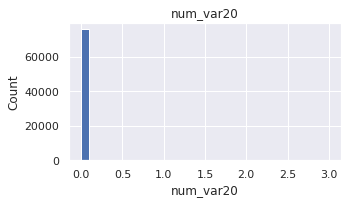

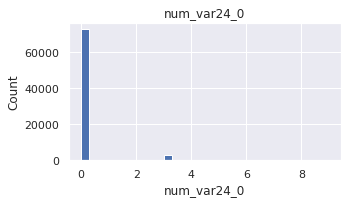

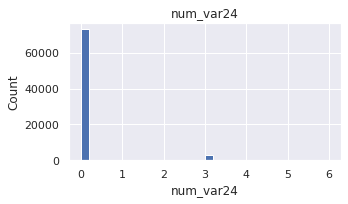

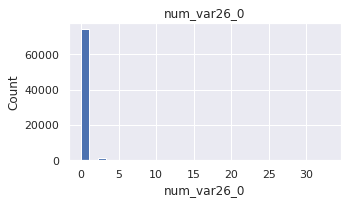

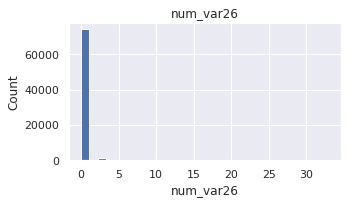

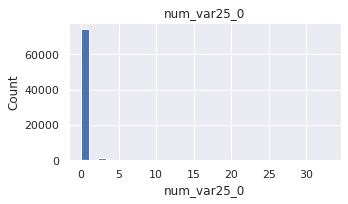

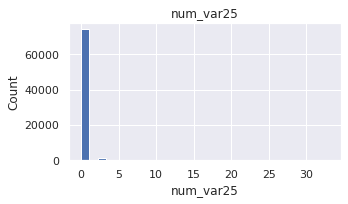

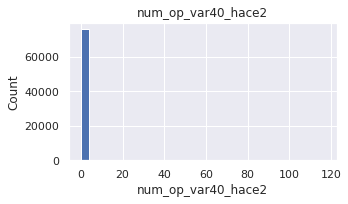

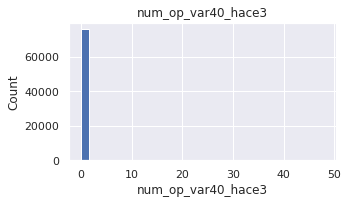

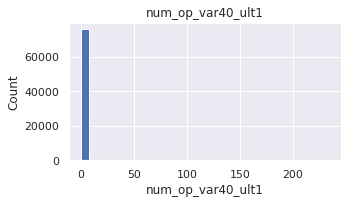

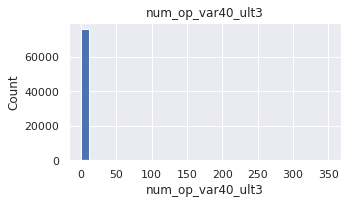

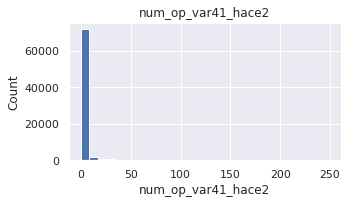

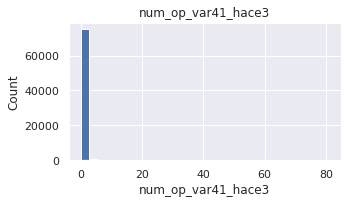

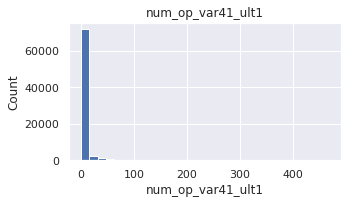

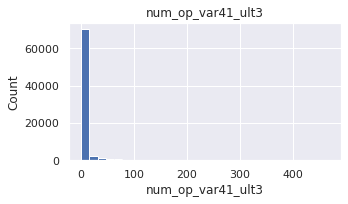

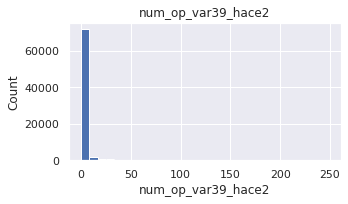

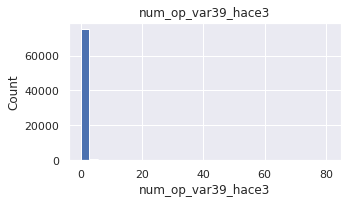

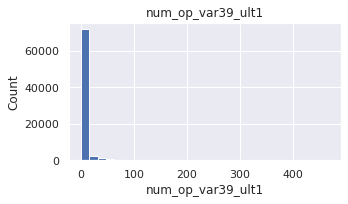

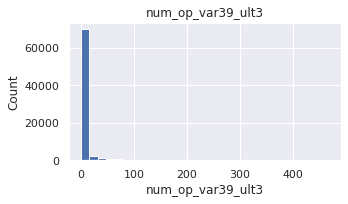

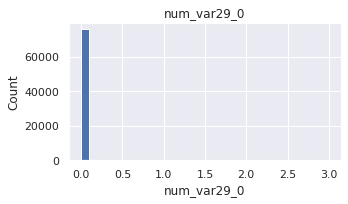

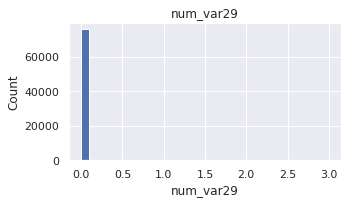

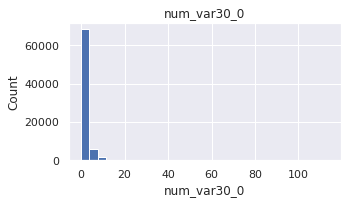

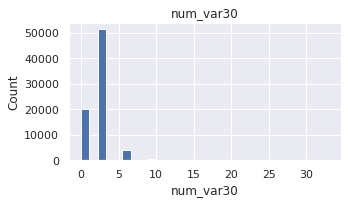

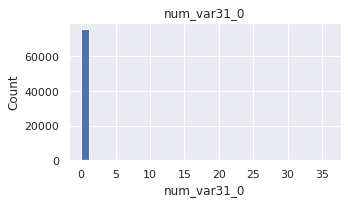

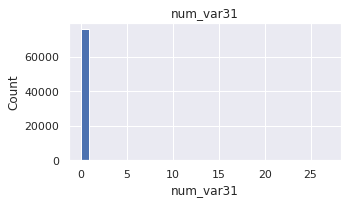

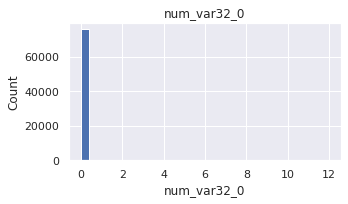

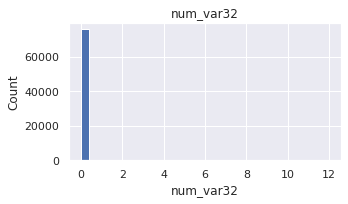

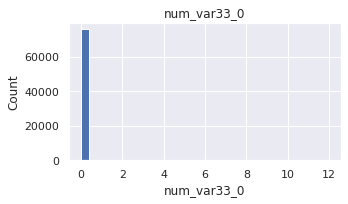

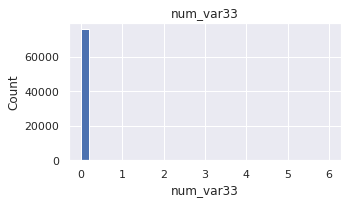

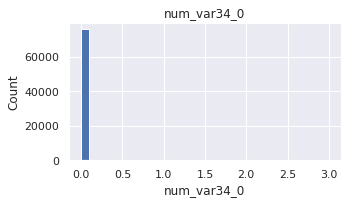

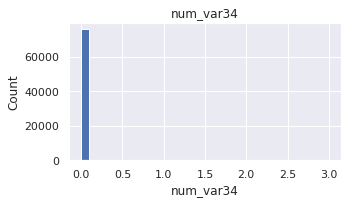

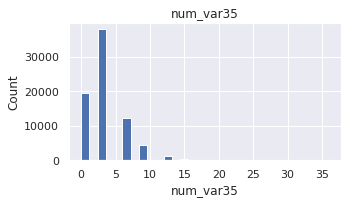

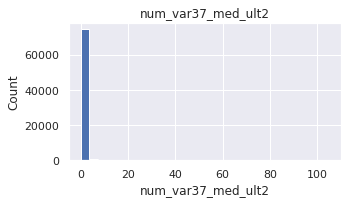

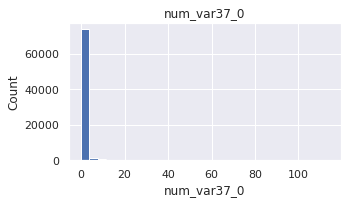

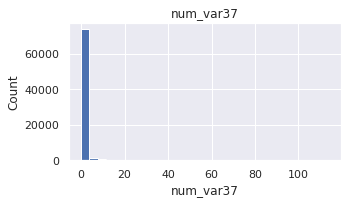

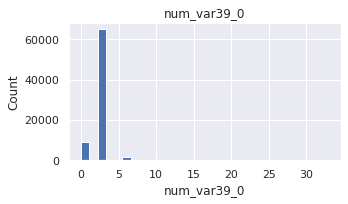

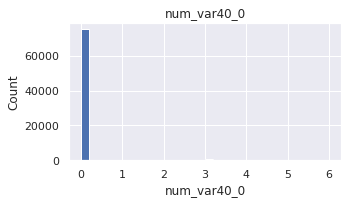

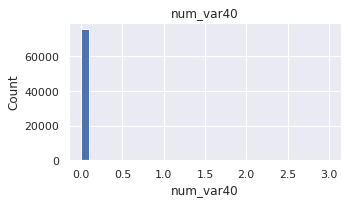

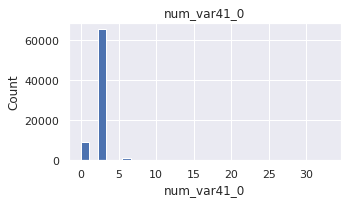

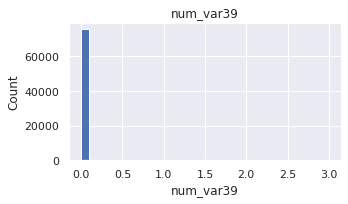

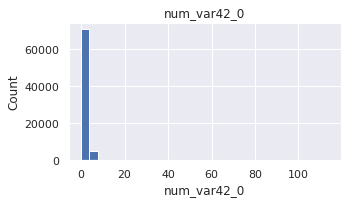

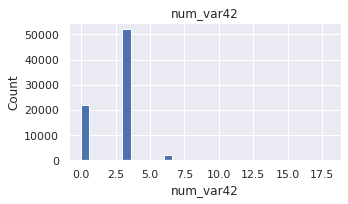

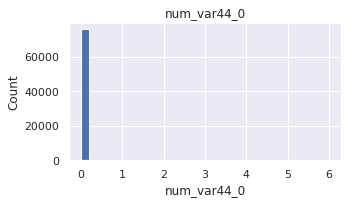

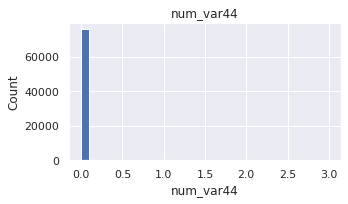

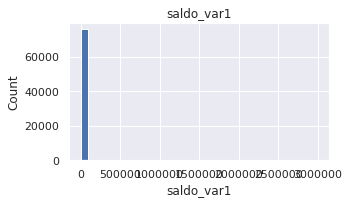

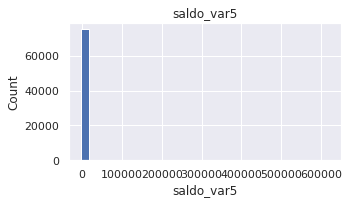

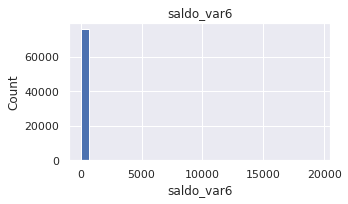

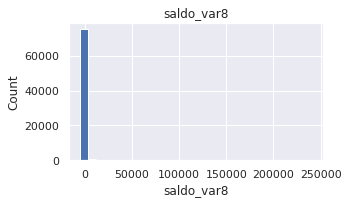

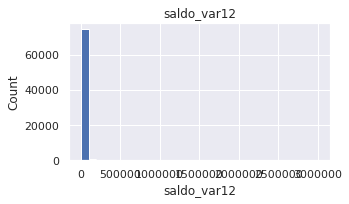

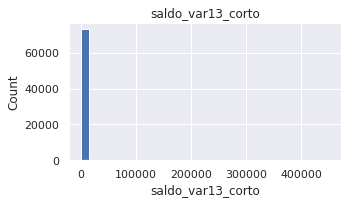

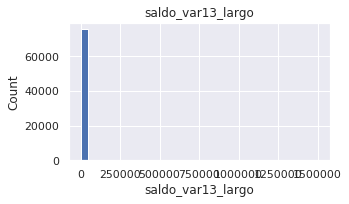

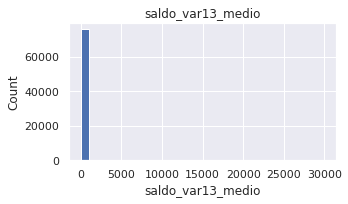

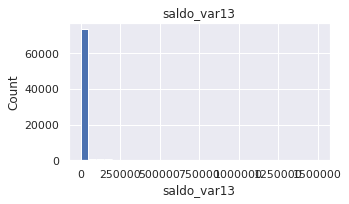

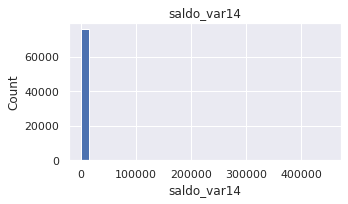

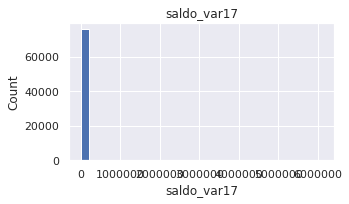

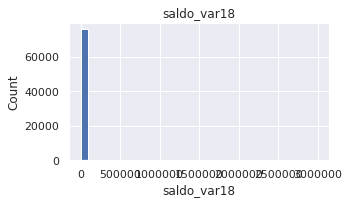

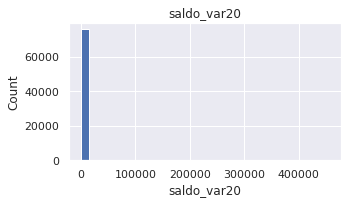

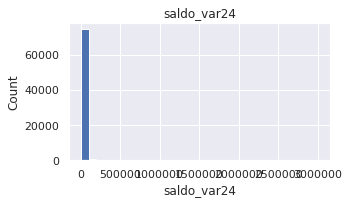

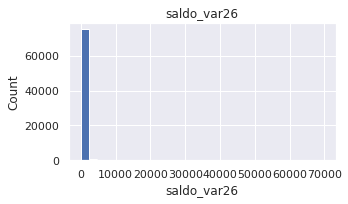

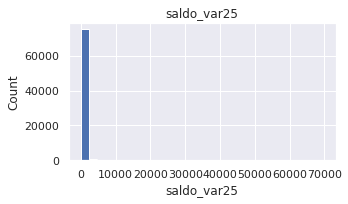

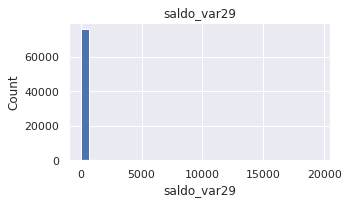

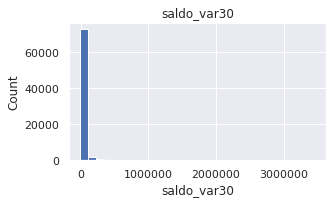

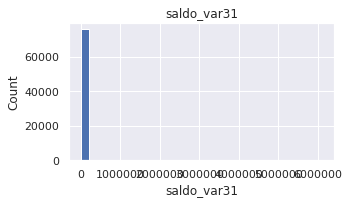

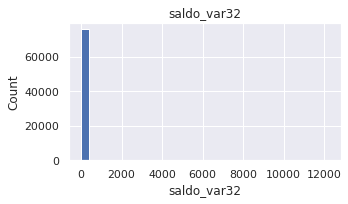

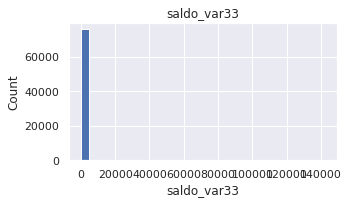

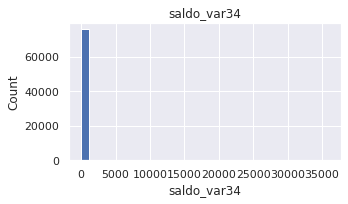

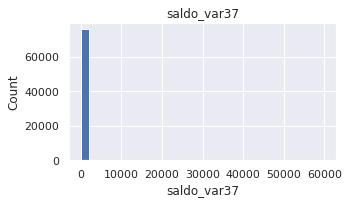

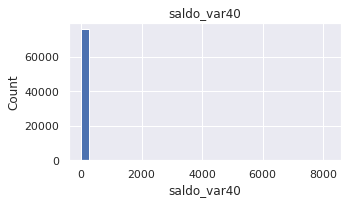

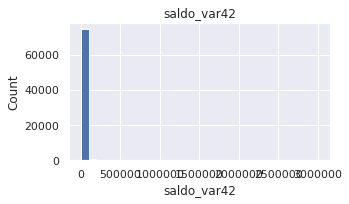

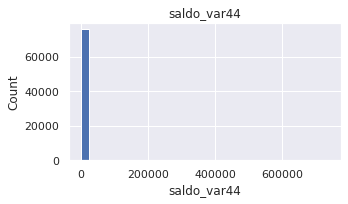

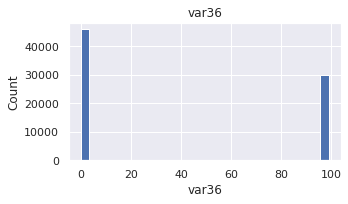

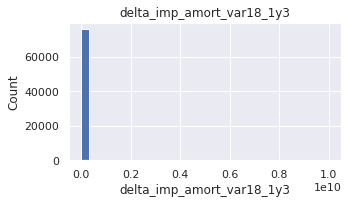

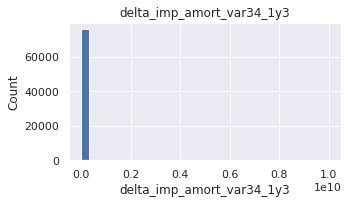

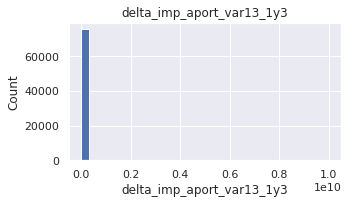

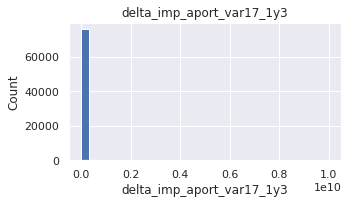

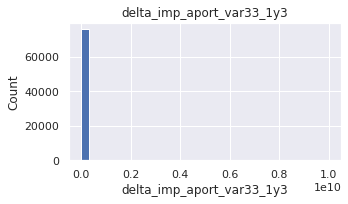

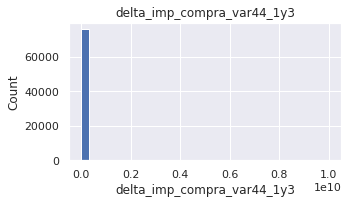

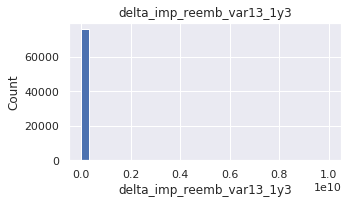

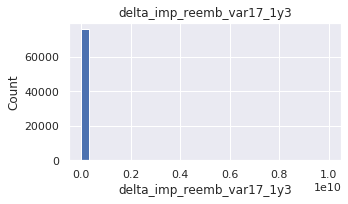

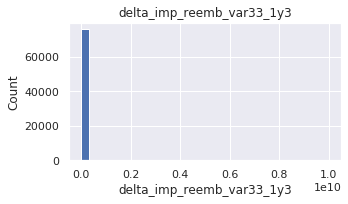

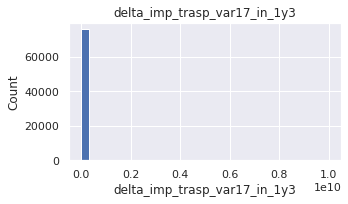

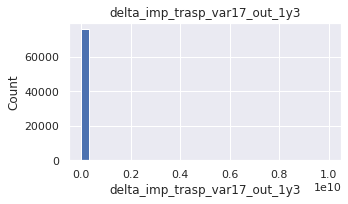

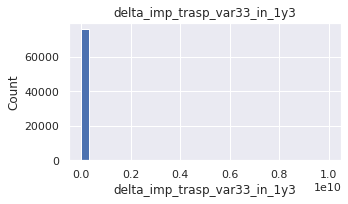

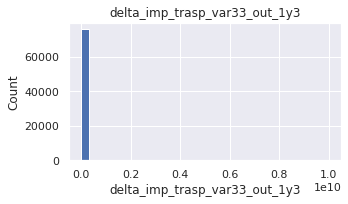

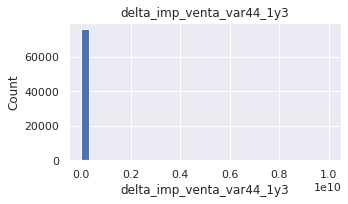

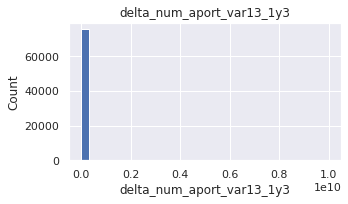

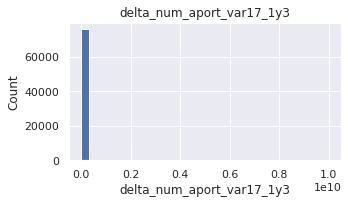

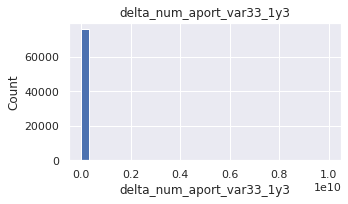

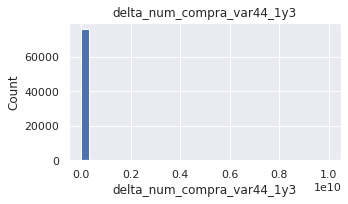

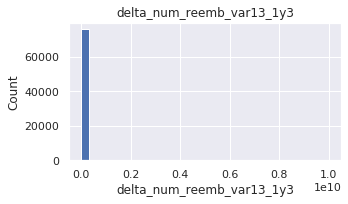

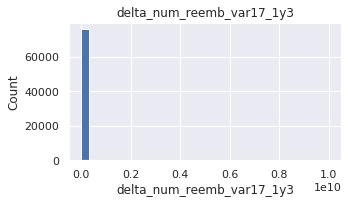

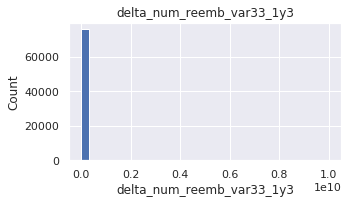

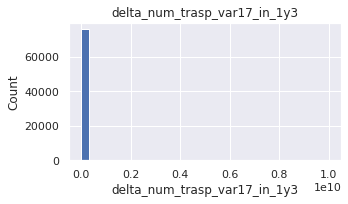

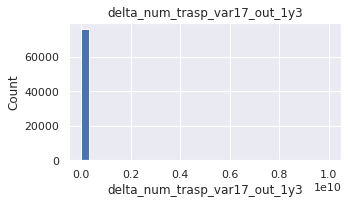

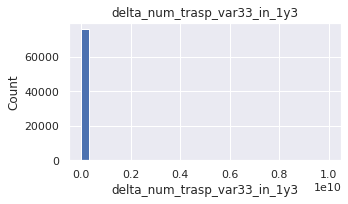

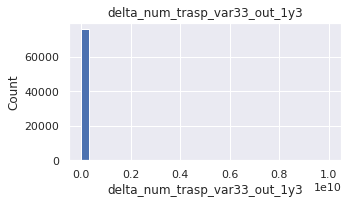

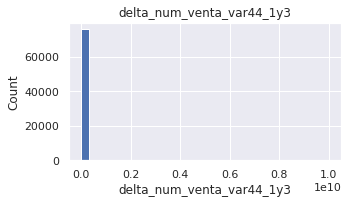

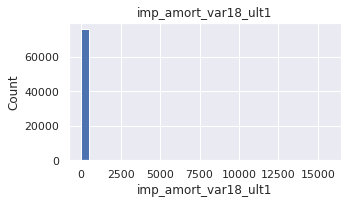

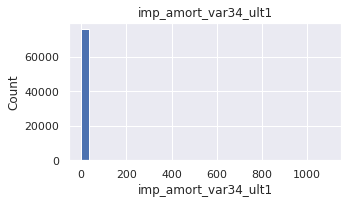

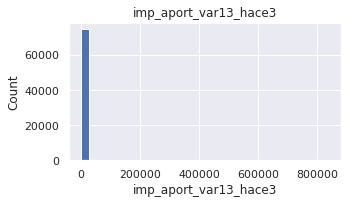

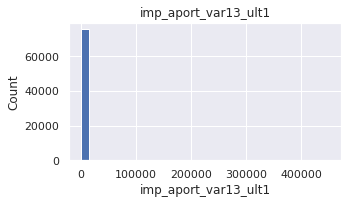

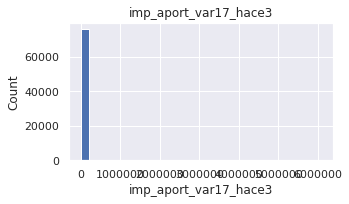

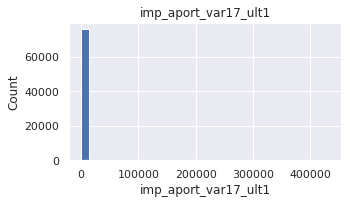

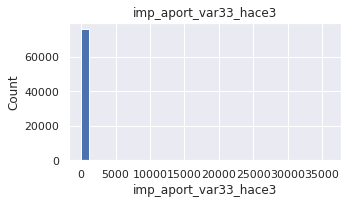

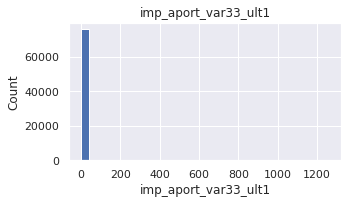

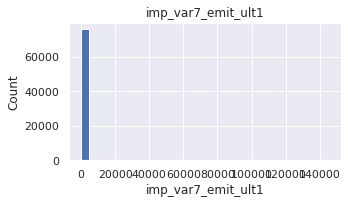

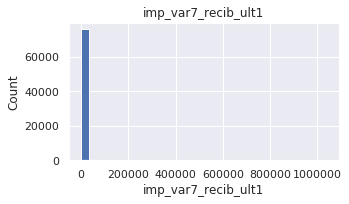

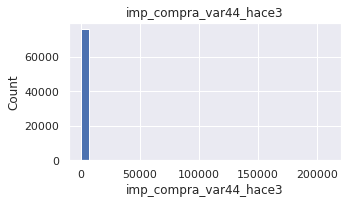

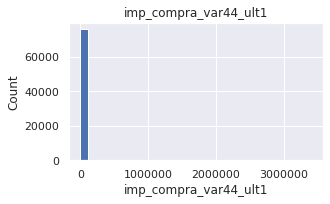

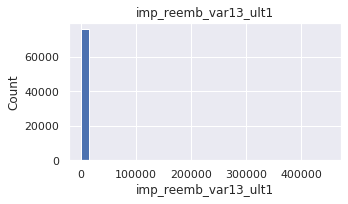

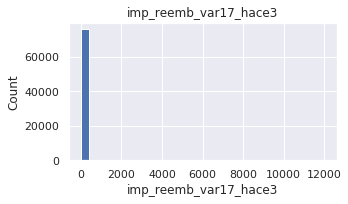

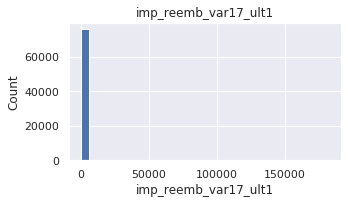

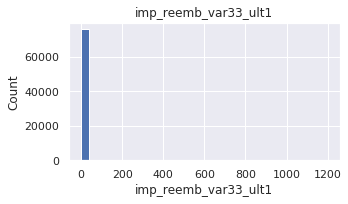

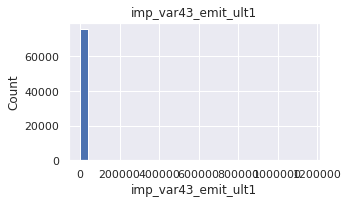

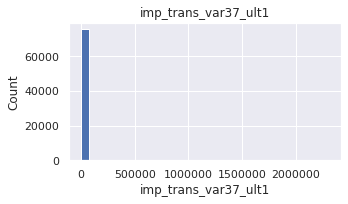

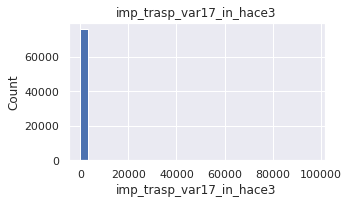

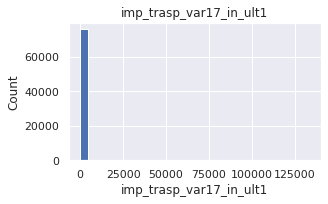

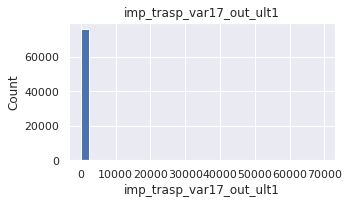

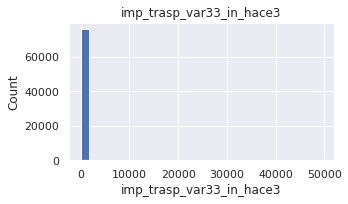

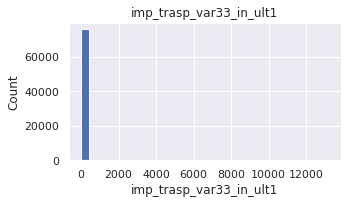

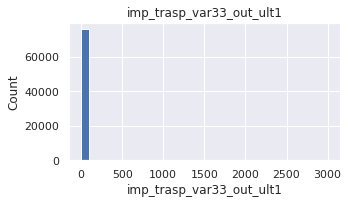

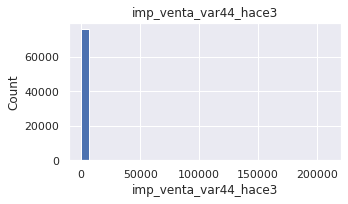

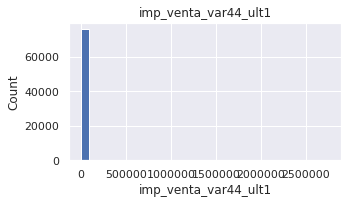

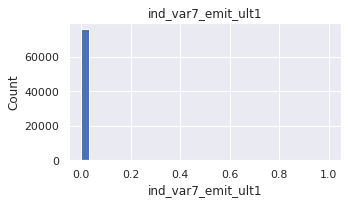

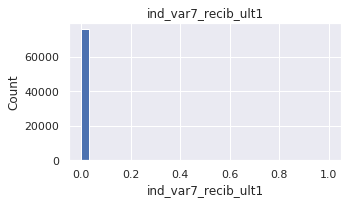

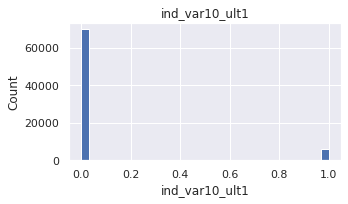

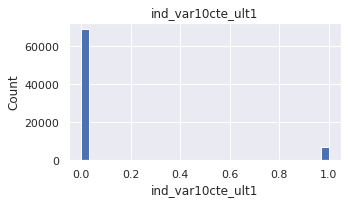

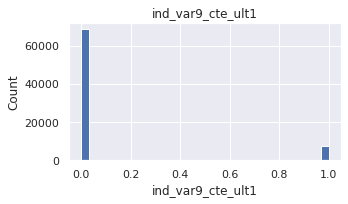

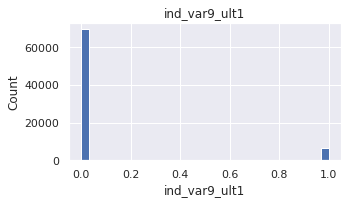

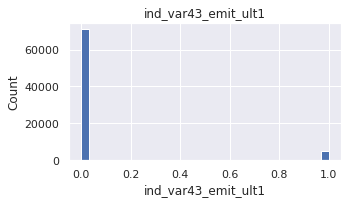

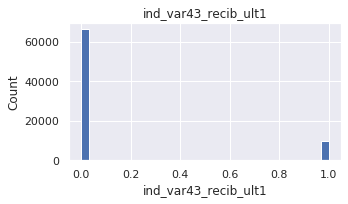

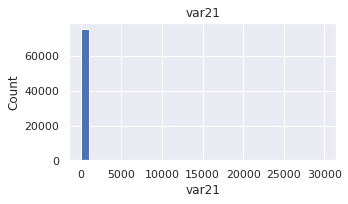

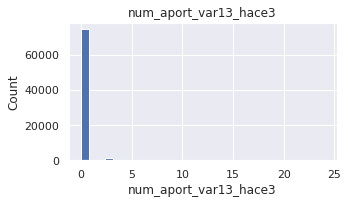

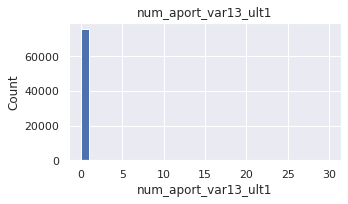

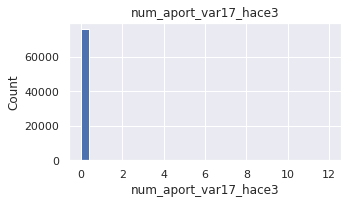

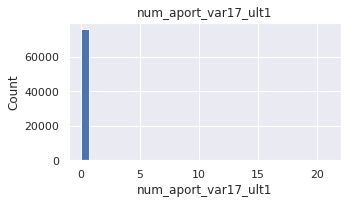

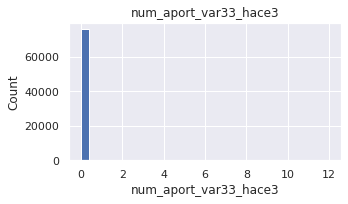

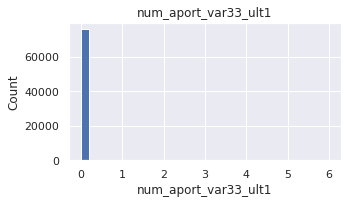

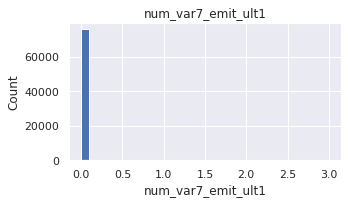

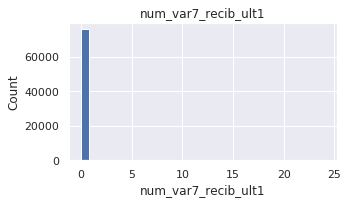

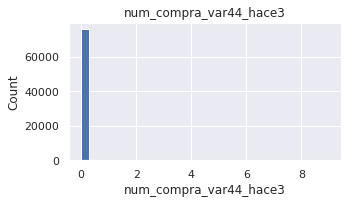

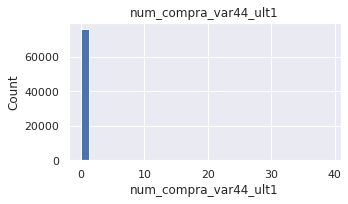

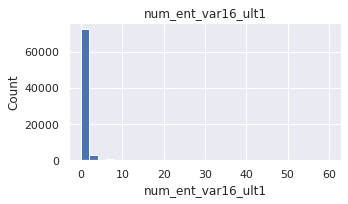

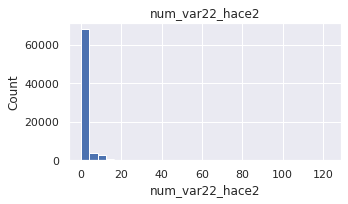

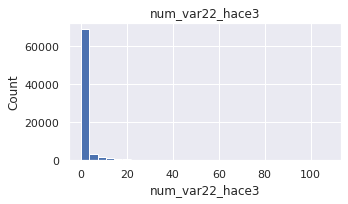

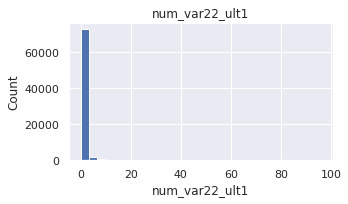

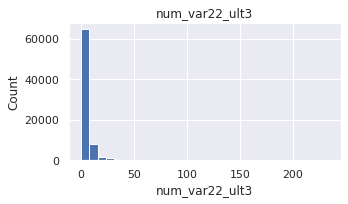

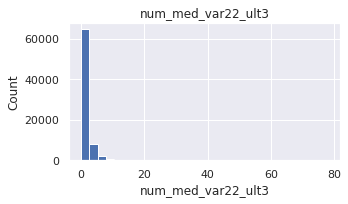

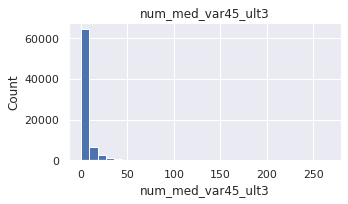

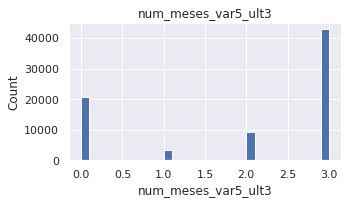

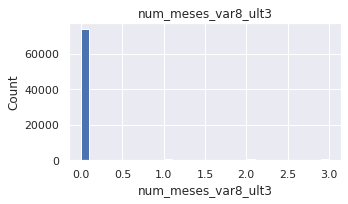

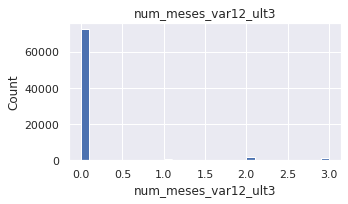

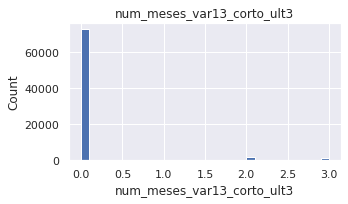

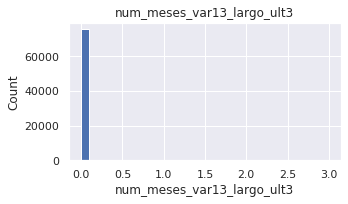

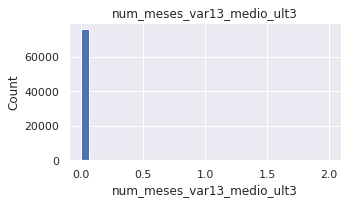

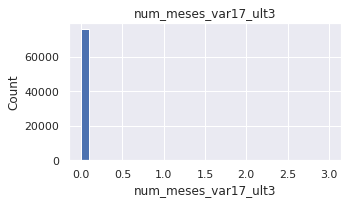

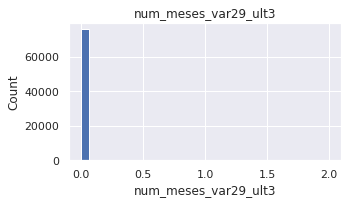

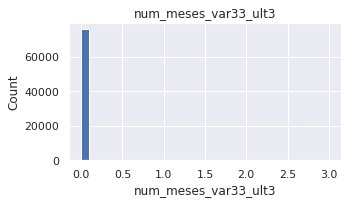

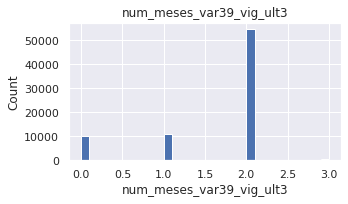

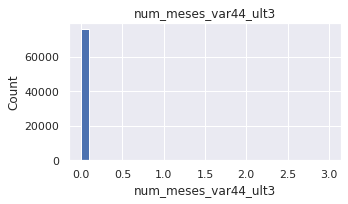

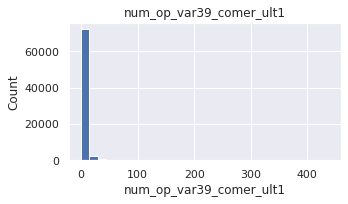

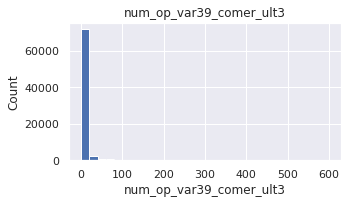

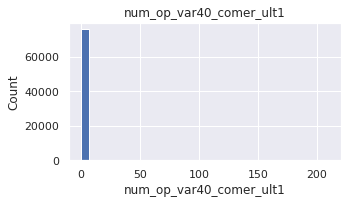

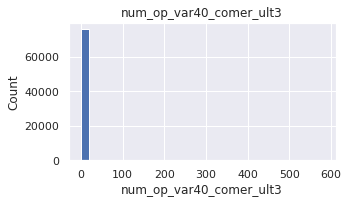

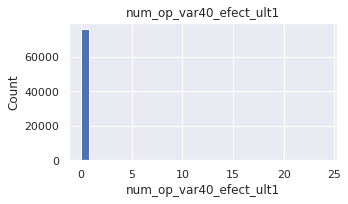

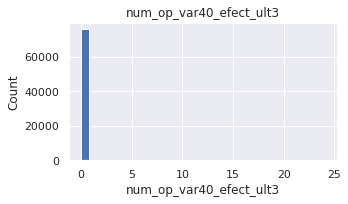

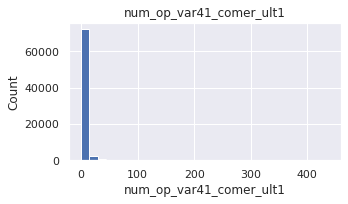

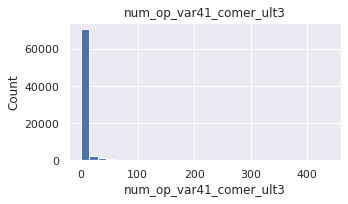

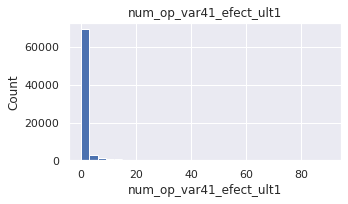

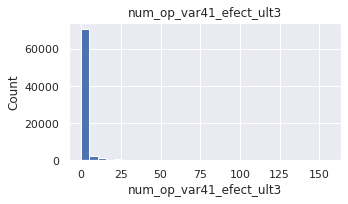

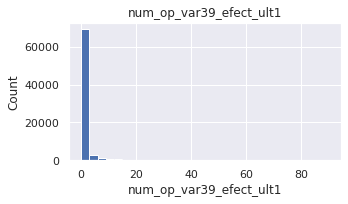

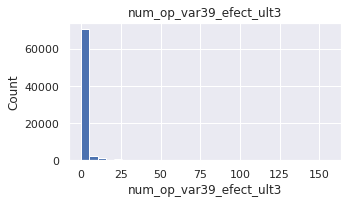

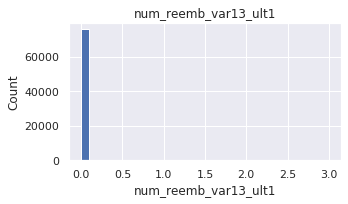

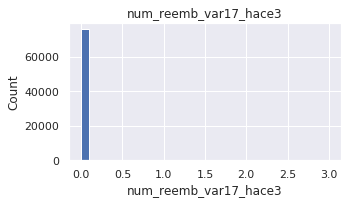

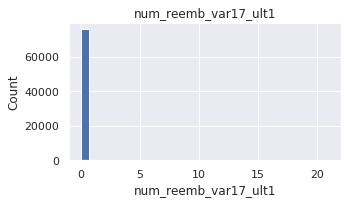

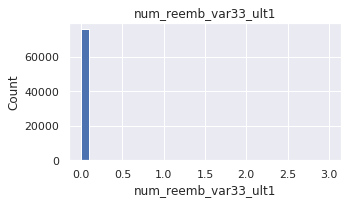

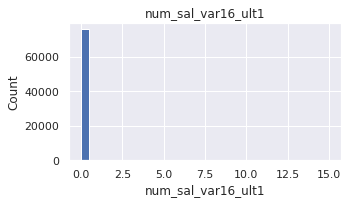

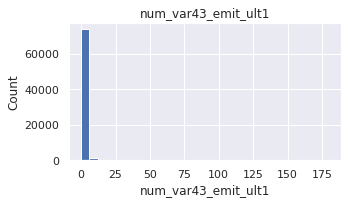

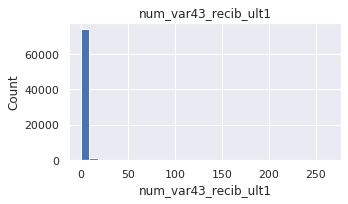

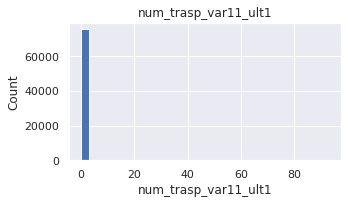

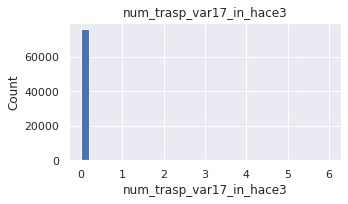

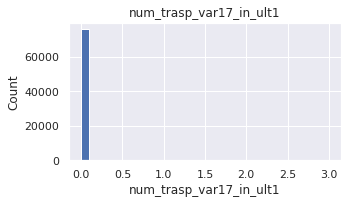

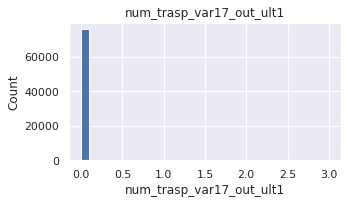

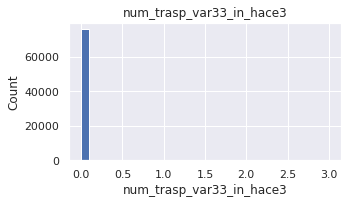

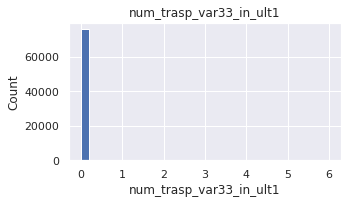

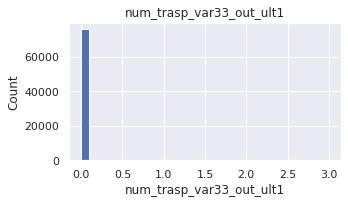

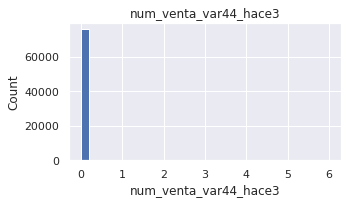

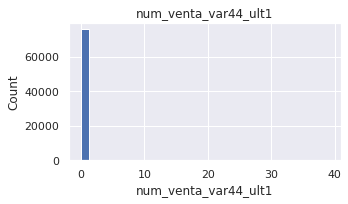

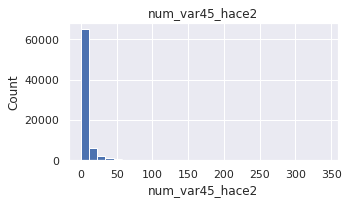

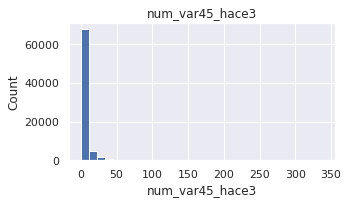

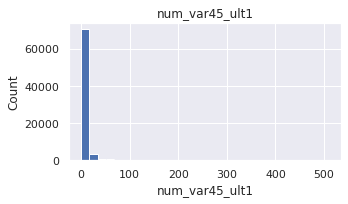

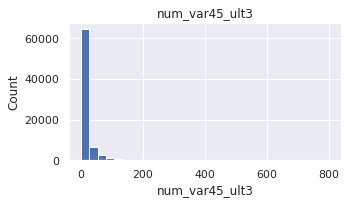

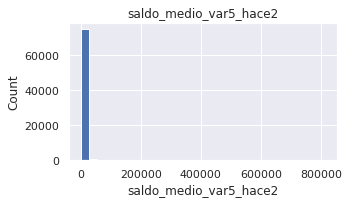

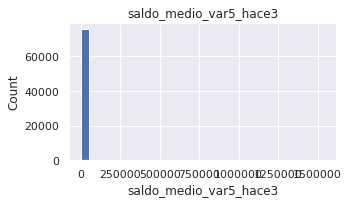

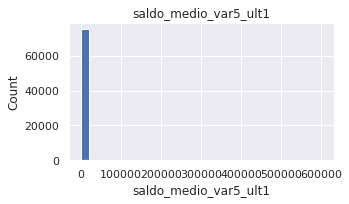

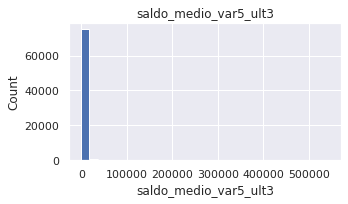

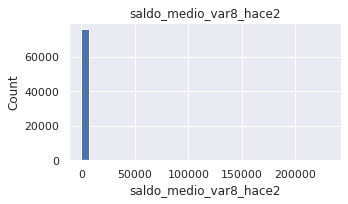

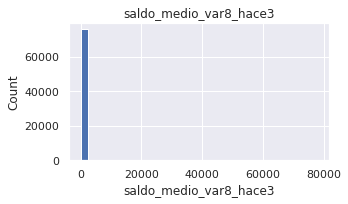

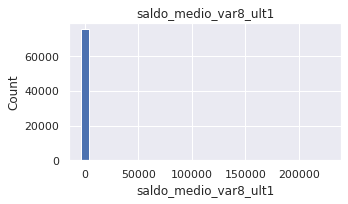

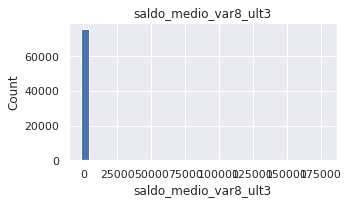

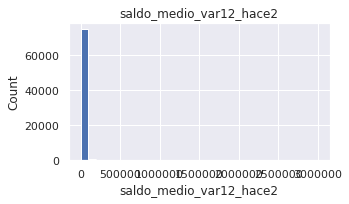

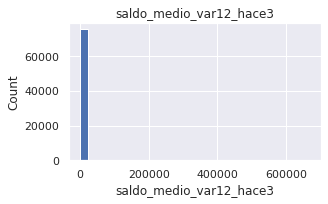

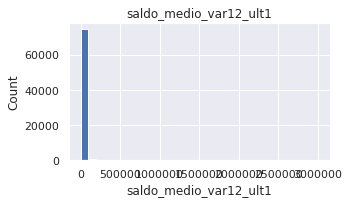

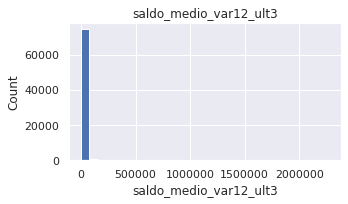

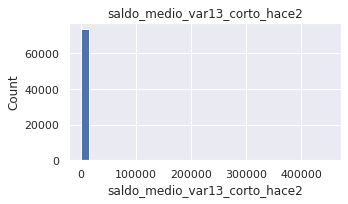

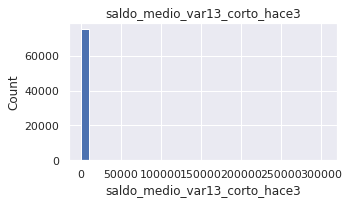

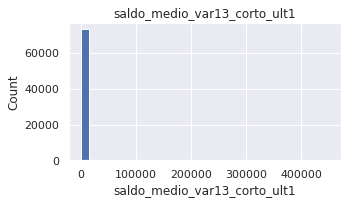

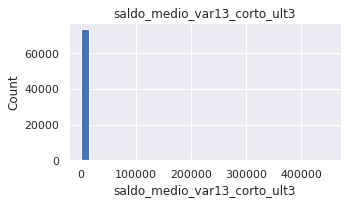

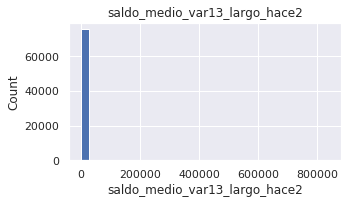

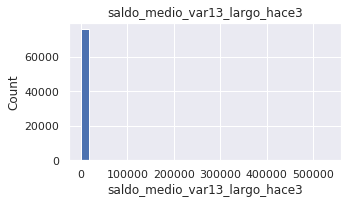

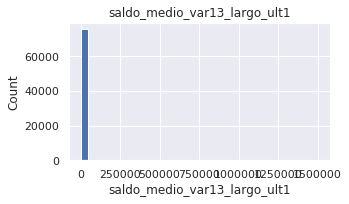

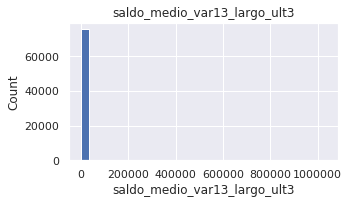

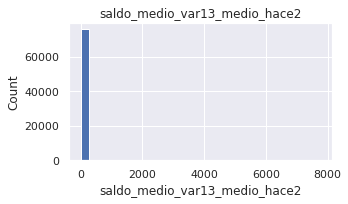

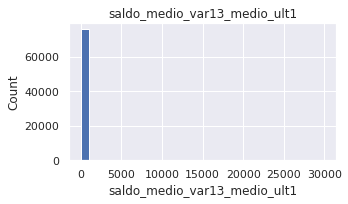

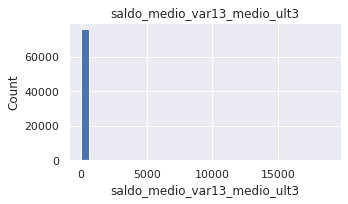

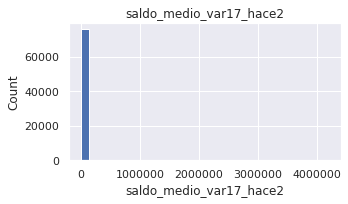

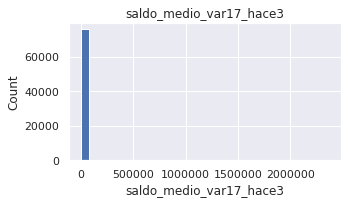

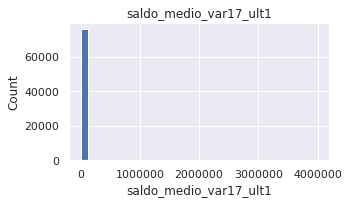

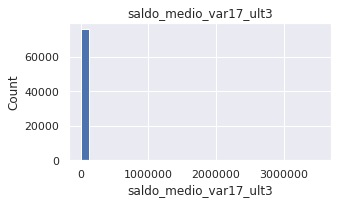

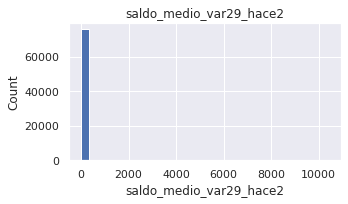

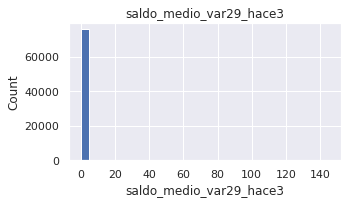

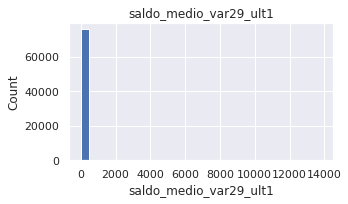

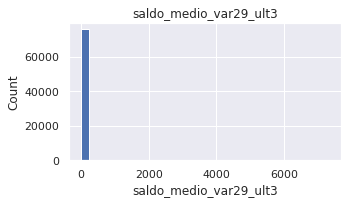

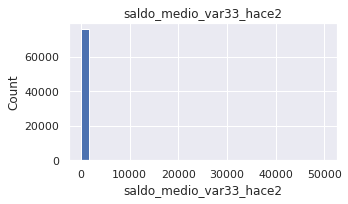

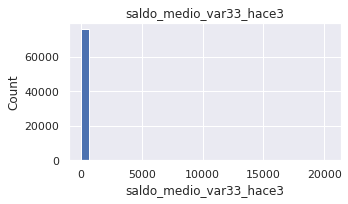

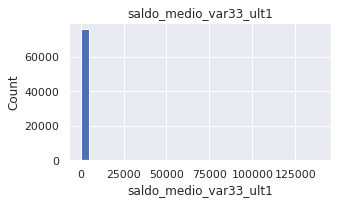

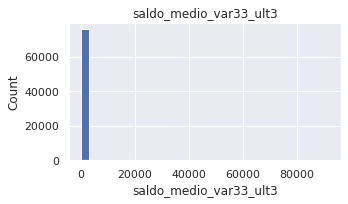

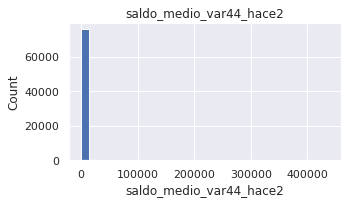

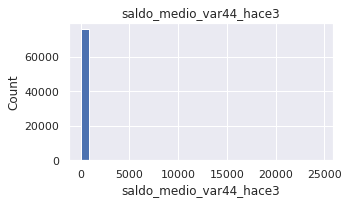

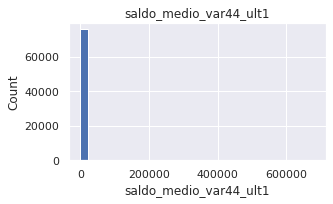

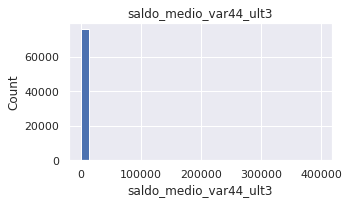

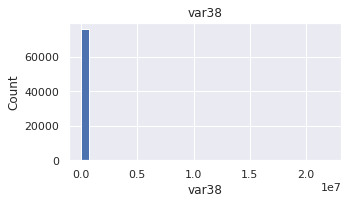

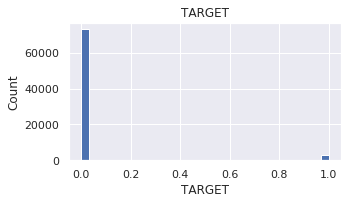

In [54]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
for i, col in enumerate(train.columns):
    sns.set()
    plt.figure(figsize=(5,3)) 
    plt.hist(train[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [28]:
# Calculate correlation matrix
train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.003674,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,-0.000856,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000297,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,-0.005687,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


Notice how we can't even see the correlation matrix for all of the variables due to large number of columns. We will try the following methods:
1. Melt the data that will result into decrease in number of columns but increase in number of rows. 
2. Shrink the size of the columns to the most important 10 features by using Univariate feature selection technique.

In [48]:
# Let's melt the data set into a smaller dimension
variables=list(train.drop(['ID', 'var3', 'var15', 'TARGET', 'var38'], axis=1).columns)
df = pd.melt(train, id_vars=['ID', 'var3', 'var15', 'TARGET', 'var38'], value_vars = variables)
df.head()

,ID,var3,var15,TARGET,var38,variable,value
0,1,2,23,0,39205.170000,imp_ent_var16_ult1,0.0
1,3,2,34,0,49278.030000,imp_ent_var16_ult1,0.0
2,4,2,23,0,67333.770000,imp_ent_var16_ult1,0.0
3,8,2,37,0,64007.970000,imp_ent_var16_ult1,0.0
4,10,2,39,0,117310.979016,imp_ent_var16_ult1,0.0


In [63]:
df.shape

(25238640, 7)

In [60]:
df.dropna(how='any', inplace=True)

In [62]:
df = df.drop_duplicates()

In [64]:
df['ID'].is_unique

False

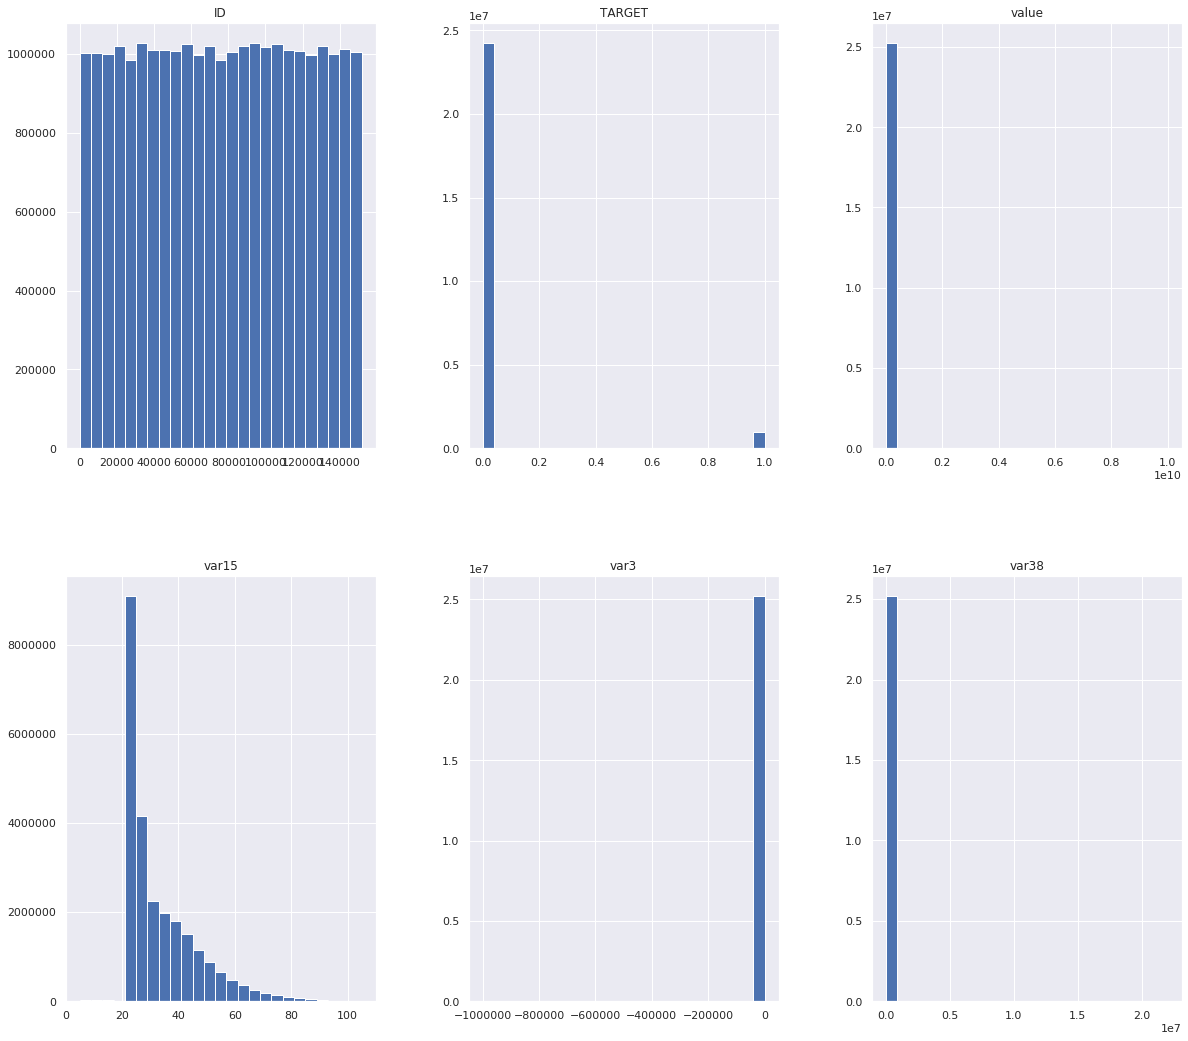

In [66]:
# Histogram
df.hist(df.columns, bins=25, layout=(2,3), figsize=(20, 18))
plt.show()

#### Feature importance and selection

In [16]:
# Let's scale the values first
from sklearn.preprocessing import MinMaxScaler
x = train.drop(['TARGET'], axis=1)
y = train['TARGET']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
# Apply SelectKBest class to extract the 10 features that best explains the relationships - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score'))

                 Feature       Score
253  num_meses_var5_ult3  474.584918
23              ind_var5  468.257507
58             ind_var30  455.821225
174                var36  451.071536
26            ind_var8_0  160.110889
37             ind_var13  113.217189
30           ind_var13_0  112.246032
28           ind_var12_0  103.522051
82              num_var5   93.461748
32       ind_var13_corto   86.419227


In [18]:
columns = ['num_meses_var5_ult3', 'ind_var5', 'ind_var30', 'var36', 'ind_var8_0', 'ind_var13', 'ind_var13_0', 'ind_var12_0', 
          'num_var5', 'ind_var13_corto']

In [19]:
sub_train = train[columns]

In [20]:
sub_train.shape

(76020, 10)

In [35]:
sub_train.dtypes

num_meses_var5_ult3    int64
ind_var5               int64
ind_var30              int64
var36                  int64
ind_var8_0             int64
ind_var13              int64
ind_var13_0            int64
ind_var12_0            int64
num_var5               int64
ind_var13_corto        int64
dtype: object

Hmmmmmm, all of these are categorical variables. It is a problem!!!

### Package 1: Pandas-Profiling

https://github.com/pandas-profiling/pandas-profiling


In [ ]:
#pip install pandas-profiling
from pandas_profiling import ProfileReport

In [24]:
profile = ProfileReport(sub_train, title="Pandas Profiling Report")

NameError: name 'ProfileReport' is not defined

In [57]:
profile.to_widgets()

ImportError: cannot import name '_check_savefig_extra_args'

In [42]:
profile.to_file("your_report.html")

KeyboardInterrupt: 

__NOTE__: Pandas-profiling couldn't process the data due to its size and not enough compute resource

### Package 2:  ClfAutoEDA

- Read the article https://medium.com/analytics-vidhya/automated-eda-for-classification-77c25b847e43
- Download the py code in the directory you are working: https://github.com/jatinkataria94/EDA-Classification/blob/master/ClfAutoEDA.py

In [22]:
# import the autoEDA module
from ClfAutoEDA import *

In [25]:
#Just play with small data portion
#Setting parameter values
target_variable_name='TARGET'
labels=['Unhappy','Happy']
#Calling EDA function with parameters of choice
df_processed,num_features,cat_features=EDA(df=df,labels=labels,
                                         target_variable_name=target_variable_name,
                                         data_summary_figsize=(6,6),
                                         corr_matrix_figsize=(6,6), 
                                         corr_matrix_annot=True,
                                         pairplt=True)

The data looks like this: 
    ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0  

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A5955D0798> (for post_execute):


KeyboardInterrupt: 

__NOTE__: Pandas-profiling couldn't process the data due to its size and not enough compute resource

# So far how do you feel? 

# Pack 2. Sweetviz

Read the article https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34

Install it using pip install sweetviz and run the next.

In [4]:
import sweetviz

In [6]:
#This will tke too much time if 
my_report = sweetviz.compare([train_mini, "Train"], [test_mini, "Test"], "TARGET")


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
:TARGET::                          |███                  | [ 14%]   00:00  -> (00:00 left)
:TARGET::                          |██████               | [ 29%]   00:00  -> (00:00 left)
:var3:                             |██████               | [ 29%]   00:00  -> (00:00 left)/Users/yusufbilgic/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/yusufbilgic/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nes

Creating Associations graph... DONE!


In [7]:
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html

Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Pack 3. Pycaret

A complex level pack that does all!

Read the article https://github.com/pycaret/pycaret and examples https://github.com/pycaret/pycaret/tree/master/examples.

Install it using pip install pycaret.

Practice it with the dataset here.

# More Resources to Practice
- https://www.kaggle.com/c/santander-customer-satisfaction and see many notebooks prepared
- https://www.kaggle.com/cast42/exploring-features
